# Testing LDA, QDA, Naive Bayes with iris dataset

## Testing LDA

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from LDA import LDAClassifier
from QDA import QDAClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
# Load the data
data = load_iris()
X = data.data
Y = data.target

In [5]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
# Initialize the model
model = LDAClassifier()
model.fit(X_train, Y_train)
model.predict(X_test)

[1. 0. 1. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 2. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 1. 2. 0. 0.]


array([1., 0., 1., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 2., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 1., 2., 0., 0.])

In [7]:
model.score(Y_test)

0.9


In [8]:
# Compare with sklearn model
sk_model = LinearDiscriminantAnalysis()
sk_model.fit(X_train, Y_train)
sk_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
sk_model.score(X_test, Y_test)

1.0

### Testing QDA

In [11]:
qda_model = QDAClassifier()
qda_model.fit(X_train, Y_train)
qda_model.predict(X_test)

[1. 0. 2. 1. 1. 0. 1. 2. 2. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


array([1., 0., 2., 1., 1., 0., 1., 2., 2., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [12]:
qda_model.score(Y_test)

0.9666666666666667


[1. 1. 1. ... 2. 2. 2.]


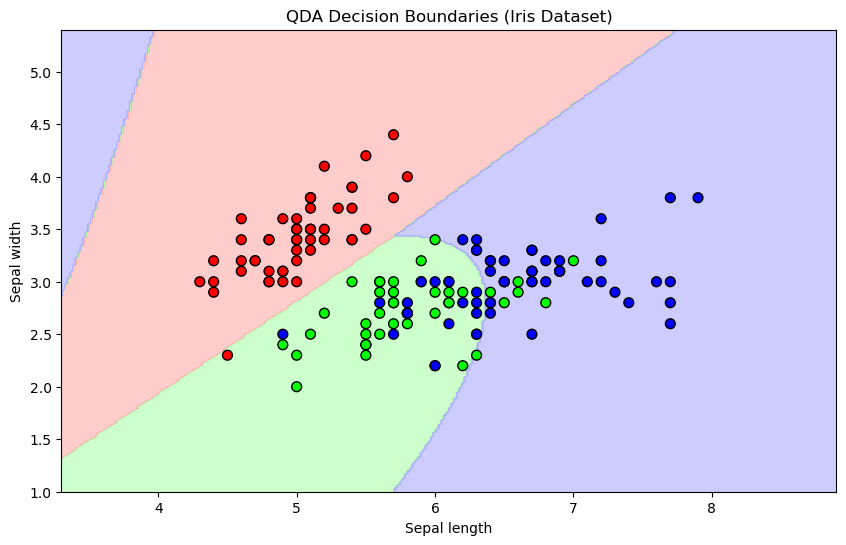

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only first two features for 2D visualization
y = iris.target

# Fit your QDA classifier
model = QDAClassifier()
model.fit(X, y)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict on meshgrid to get class labels
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('QDA Decision Boundaries (Iris Dataset)')
plt.show()


[1. 1. 1. ... 2. 2. 2.]


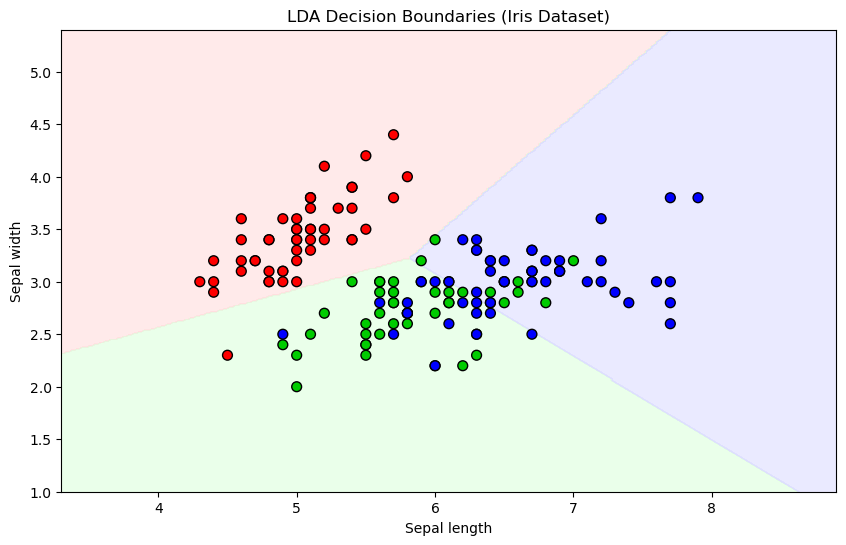

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # First two features: Sepal length and width
y = iris.target

# Fit your custom LDA classifier
lda_model = LDAClassifier()
lda_model.fit(X, y)

# Create a mesh grid over the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh
Z = lda_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(["#FFDDDD", "#DDFFDD", "#DDDDFF"])
cmap_bold = ListedColormap(["#FF0000", "#00CC00", "#0000FF"])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Overlay the training data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=50)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("LDA Decision Boundaries (Iris Dataset)")
plt.show()
